In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [2]:
# 📥 Step 2: Load Dataset
file_path = "SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv"
df = pd.read_csv(file_path)

# Preview the top rows
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [3]:
# 🧹 Step 3: Initial Data Cleaning

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Remove the header row accidentally included inside the data (first row)
df = df[df["Supply Chain Emission Factors without Margins"] != "Supply Chain Emission Factors without Margins"]

# Convert object columns to numeric
df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(df["Supply Chain Emission Factors without Margins"], errors='coerce')
df["Supply Chain Emission Factors with Margins"] = pd.to_numeric(df["Supply Chain Emission Factors with Margins"], errors='coerce')


In [4]:
# 🧼 Step 4: Handling Missing Values

# Check for missing data
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing emissions (optional based on need)
df.dropna(subset=["Supply Chain Emission Factors with Margins"], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


Missing values:
 Industry Code                                             0
Industry Name                                             0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
dtype: int64


In [6]:
# 🔍 Step 5: Dataset Summary

print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
df.info()


Shape of dataset: (263, 12)

Column Names:
 ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           263 non-null    object 
 1   Industry Name                                           263 non-null    object 
 2   Substance                                    

In [7]:
# 🧮 Step 6: Descriptive Statistics
df.describe(include='all')


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
count,263,263,263,263,263.000000,263.000000,263.000000,263.000000,263.0,263.0,263.000000,263.0
unique,66,66,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,113FF,"Forestry, fishing, and related activities",methane,"kg/2018 USD, purchaser price",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,4,66,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.078597,0.001897,0.080483,3.403042,2.0,1.0,2.806084,1.0
std,NaN,NaN,NaN,NaN,0.264294,0.007269,0.266251,0.556974,0.0,0.0,1.252646,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,2.0,1.0,1.000000,1.0
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,2.0,1.0,1.000000,1.0
50%,NaN,NaN,NaN,NaN,0.002000,0.000000,0.002000,3.000000,2.0,1.0,3.000000,1.0
75%,NaN,NaN,NaN,NaN,0.039500,0.000000,0.039500,4.000000,2.0,1.0,4.000000,1.0


C:\Users\hp\AppData\Local\Temp\ipykernel_7448\278833189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")
C:\Users\hp\AppData\Local\Temp\ipykernel_7448\278833189.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


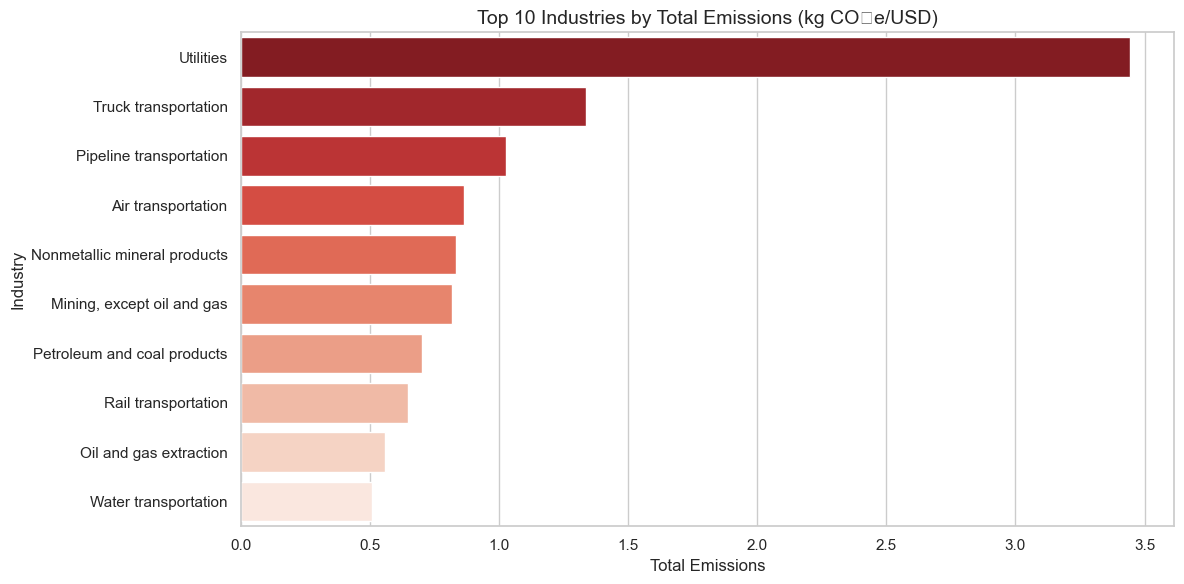

In [8]:
# 🎯 7.1 Top Emitting Industries (Total emissions summed across substances)
industry_emissions = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum()
industry_emissions = industry_emissions.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")
plt.title("Top 10 Industries by Total Emissions (kg CO₂e/USD)", fontsize=14)
plt.xlabel("Total Emissions")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


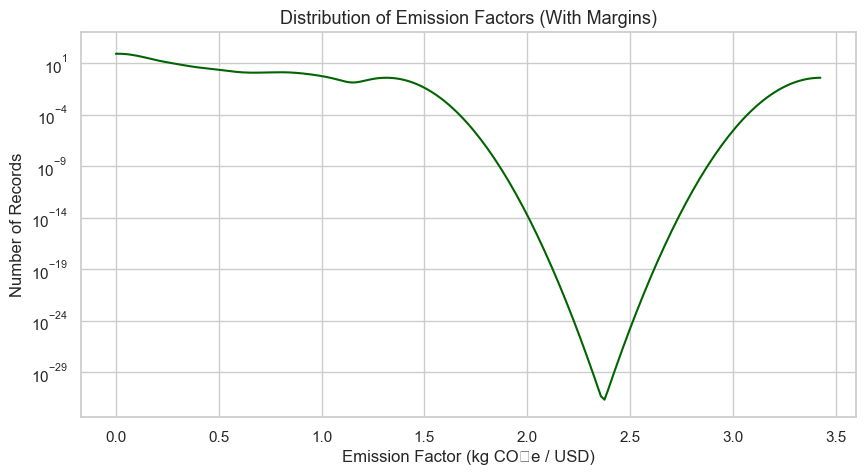

In [9]:
# 🧪 7.2 Distribution of Emission Factors
plt.figure(figsize=(10,5))
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=40, kde=True, color="darkgreen", log_scale=(False, True))
plt.title("Distribution of Emission Factors (With Margins)", fontsize=13)
plt.xlabel("Emission Factor (kg CO₂e / USD)")
plt.ylabel("Number of Records")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_7448\1964002315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_7448\1964002315.py:9: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


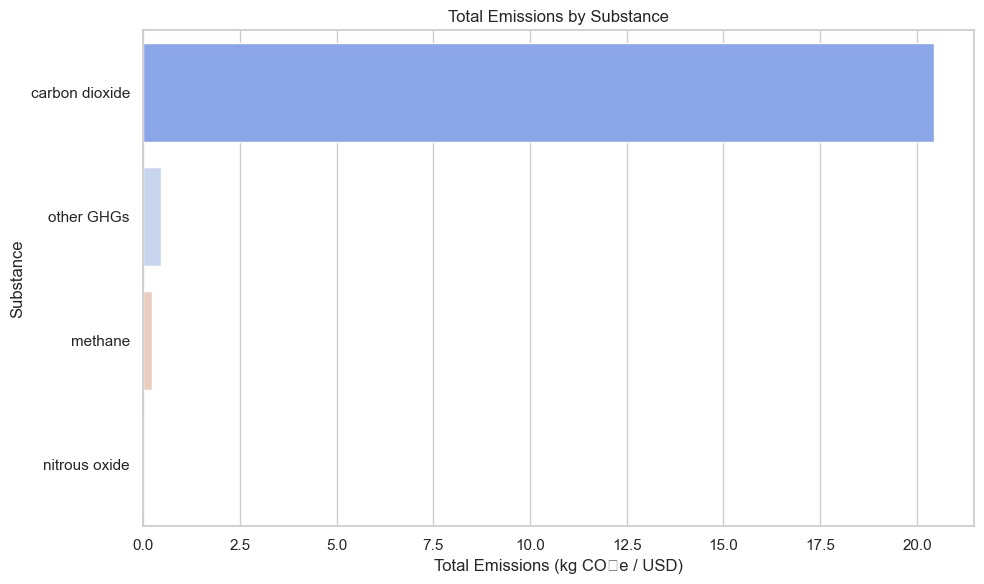

In [10]:
# 💨 7.3 Emissions by Substance Type
substance_emissions = df.groupby("Substance")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")
plt.title("Total Emissions by Substance")
plt.xlabel("Total Emissions (kg CO₂e / USD)")
plt.ylabel("Substance")
plt.tight_layout()
plt.show()


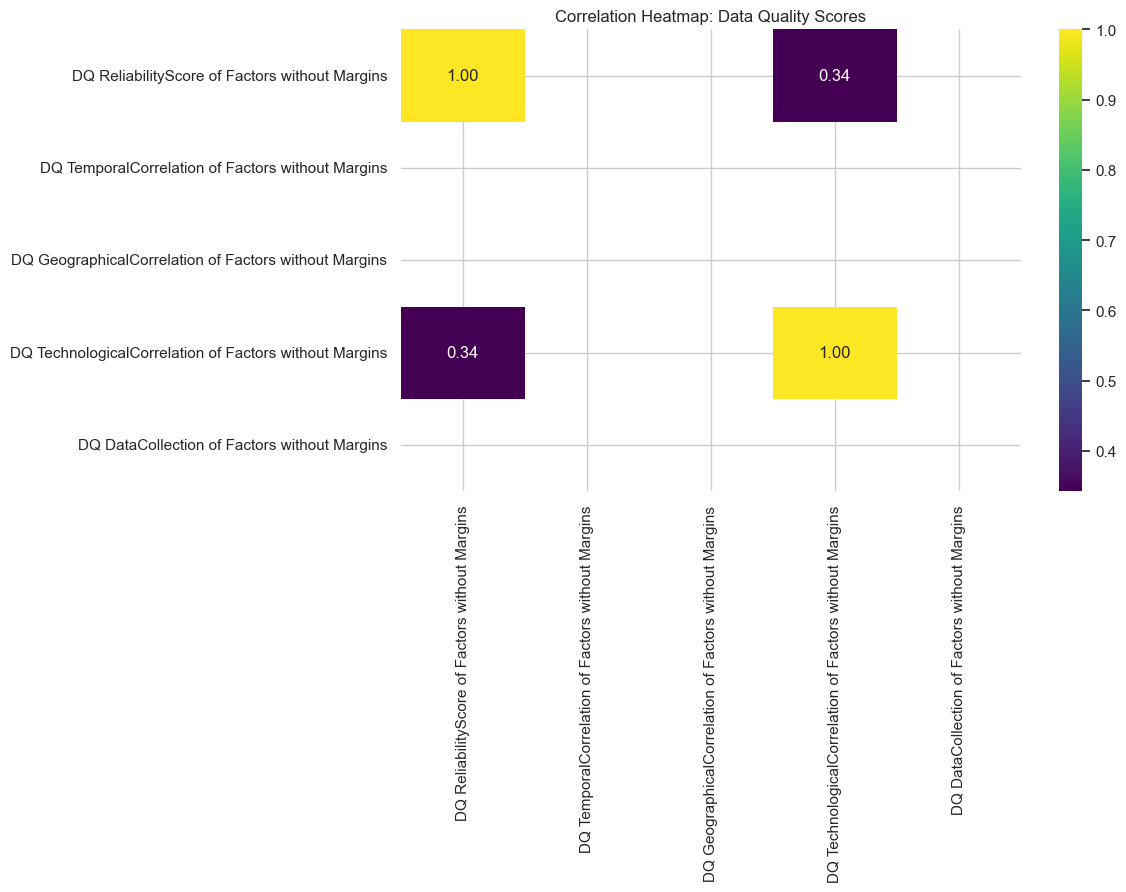

In [11]:
# 📈 7.4 Correlation Heatmap of Data Quality Scores
dq_cols = [col for col in df.columns if "DQ" in col]

plt.figure(figsize=(10,6))
sns.heatmap(df[dq_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap: Data Quality Scores")
plt.show()


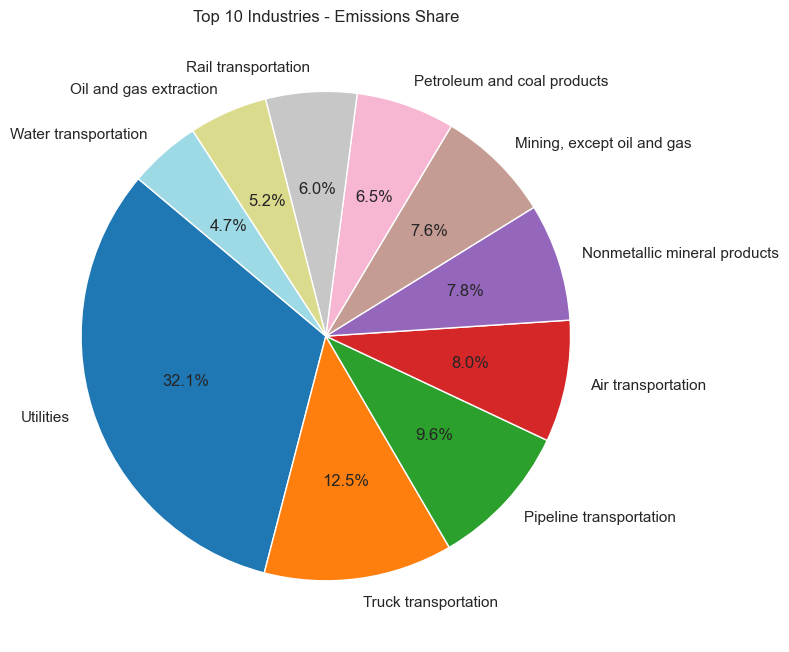

In [12]:
# 🧩 7.5 Optional: Pie Chart of Top Industry Emissions Share
industry_emissions_top = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
industry_emissions_top.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Top 10 Industries - Emissions Share")
plt.ylabel('')
plt.tight_layout()
plt.show()
